# Artificial Neural Network - Churn Modelling

### Part 1 - Data Preprocessing

In [3]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
# Importing the dataset
dataset = pd.read_csv('https://raw.githubusercontent.com/datasciencelearnofficial/Deep-Learning/master/Datasets/Churn_Modelling/Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
# Seperating the Independent and dependent features
X = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]

In [6]:
# Create dummy variables
geography=pd.get_dummies(X["Geography"],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

In [7]:
# Concatenate the Data Frames
X=pd.concat([X,geography,gender],axis=1)

In [8]:
# Drop Unnecessary columns
X=X.drop(['Geography','Gender'],axis=1)

In [9]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [10]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Part 2 - Building an Artificial Neural Network Model

In [11]:
# Importing the Keras libraries and packages
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [23]:
# Initialising the ANN
classifier = Sequential()

In [24]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(6, input_dim=11 , kernel_initializer = 'he_uniform', activation='relu'))

In [25]:
# Adding the second hidden layer
classifier.add(Dense(6, kernel_initializer = 'he_uniform',activation='relu'))

In [26]:
# Adding the output layer
classifier.add(Dense(1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))

In [27]:
# Compiling the ANN
classifier.compile(optimizer = 'Adamax', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [28]:
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 6)                 72        
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 7         
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


In [31]:
# Fitting the ANN to the Training set
model_history=classifier.fit(X_train, y_train,validation_split=0.33, batch_size = 10, epochs = 100)

Epoch 1/100
536/536 [==============================] - 2s 3ms/step - loss: 0.7031 - accuracy: 0.6014 - val_loss: 0.5696 - val_accuracy: 0.7096
Epoch 2/100
536/536 [==============================] - 2s 3ms/step - loss: 0.5174 - accuracy: 0.7602 - val_loss: 0.4961 - val_accuracy: 0.7925
Epoch 3/100
536/536 [==============================] - 2s 3ms/step - loss: 0.4700 - accuracy: 0.7994 - val_loss: 0.4679 - val_accuracy: 0.8073
Epoch 4/100
536/536 [==============================] - 2s 3ms/step - loss: 0.4493 - accuracy: 0.8095 - val_loss: 0.4540 - val_accuracy: 0.8069
Epoch 5/100
536/536 [==============================] - 2s 3ms/step - loss: 0.4389 - accuracy: 0.8102 - val_loss: 0.4460 - val_accuracy: 0.8054
Epoch 6/100
536/536 [==============================] - 2s 3ms/step - loss: 0.4328 - accuracy: 0.8119 - val_loss: 0.4408 - val_accuracy: 0.8069
Epoch 7/100
536/536 [==============================] - 2s 3ms/step - loss: 0.4288 - accuracy: 0.8134 - val_loss: 0.4371 - val_accuracy: 0.8092

In [32]:
# list all data in history
print(model_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


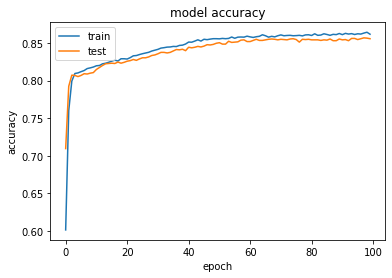

In [34]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

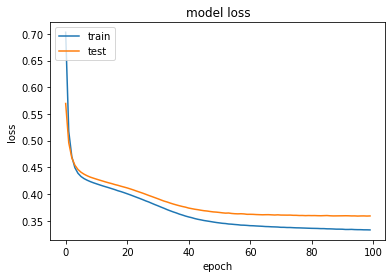

In [35]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Part 3 - Making the predictions and evaluating the model

In [37]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

In [41]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[1519   76]
 [ 193  212]]


In [42]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
print(accuracy_score(y_pred,y_test))

0.8655
